<a href="https://colab.research.google.com/github/vaibhavsharma1379/Arrays-Left-Rotation/blob/main/whatapp_chat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from collections import Counter
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
 

In [ ]:
def rawToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''
    
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r', encoding='utf-8') as raw_data:
        # print(raw_data.read())
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("group_notification")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['message'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    return df

In [ ]:
df=rawToDf('/content/WhatsApp Chat with Only pagal panti😁🤣🤭🤟🤘.txt','24hr')
df

,date_time,user,message
0,2020-10-21 13:42:00,+91 87449 99892,Mute krke padhara tga
1,2020-10-21 13:42:00,Anubhuti,Hn
2,2020-10-21 13:45:00,Nikhil Classmate,Abe padha ni rha tha
3,2020-10-21 13:45:00,Nikhil Classmate,Usne question diya tha
4,2020-10-21 13:47:00,Nikhil Classmate,Bc ab kl test hai
...,...,...,...
39994,2021-11-01 19:01:00,Nikhil Classmate,Ye
39995,2021-11-01 19:01:00,Nikhil Classmate,Abe
39996,2021-11-01 19:01:00,Nikhil Classmate,Cs valo me bheja hmare pass ni aaya abhi
39997,2021-11-01 19:01:00,Rahul Rana,This message was deleted


A

In [ ]:
df['user'].unique()

array(['+91 87449 99892', 'Anubhuti', 'Nikhil Classmate',
       '+91 98185 35862', '+91 82878 41374', '+91 79917 49980',
       '+91 788 040 0967', 'Mukul Bhardwaj', 'Aryan', '+91 80762 93754',
       'Vaibhav Sharma', '+91 87002 26750', '+91 99536 63691',
       '+91 88268 41898', 'group_notification', '+91 88408 51182',
       '+91 98187 40542', 'Yash Sec C', '+91 78385 92808',
       '+91 82872 44844', 'Mansi Chikara', '+91 72919 10778',
       '+91 93195 50644', 'Anurag Sec C', '+91 83838 58941',
       '+91 92108 59755', '+91 70659 79907', 'Akarsh Tyagi',
       '+91 77038 45509', '+91 72918 81249', '+91 93543 36182',
       '+91 97114 82189', '+91 82876 01062', '+91 76681 74779',
       '+91 79823 42417', '+91 97564 48285', '+91 93544 85371',
       '+91 70076 52698', '+91 74285 61352', '+91 99907 87745',
       'Rahul Rana', '+91 92679 47423', 'Urvashi Classmate',
       '+91 79824 00596'], dtype=object)

# **Adding Day, Month ,Year and date for further analysis**

In [ ]:
df['Day']=df['date_time'].dt.strftime('%a')
df['Month']=df['date_time'].dt.strftime('%b')
df['Year']=df['date_time'].dt.year
df['date']=df['date_time'].apply(lambda x:x.date())
df

,date_time,user,message,Day,Month,Year,date
0,2020-10-21 13:42:00,+91 87449 99892,Mute krke padhara tga,Wed,Oct,2020,2020-10-21
1,2020-10-21 13:42:00,Anubhuti,Hn,Wed,Oct,2020,2020-10-21
2,2020-10-21 13:45:00,Nikhil Classmate,Abe padha ni rha tha,Wed,Oct,2020,2020-10-21
3,2020-10-21 13:45:00,Nikhil Classmate,Usne question diya tha,Wed,Oct,2020,2020-10-21
4,2020-10-21 13:47:00,Nikhil Classmate,Bc ab kl test hai,Wed,Oct,2020,2020-10-21
...,...,...,...,...,...,...,...
39994,2021-11-01 19:01:00,Nikhil Classmate,Ye,Mon,Nov,2021,2021-11-01
39995,2021-11-01 19:01:00,Nikhil Classmate,Abe,Mon,Nov,2021,2021-11-01
39996,2021-11-01 19:01:00,Nikhil Classmate,Cs valo me bheja hmare pass ni aaya abhi,Mon,Nov,2021,2021-11-01
39997,2021-11-01 19:01:00,Rahul Rana,This message was deleted,Mon,Nov,2021,2021-11-01


### **Check overall frequency of total messages on the group**

In [ ]:
new_df=df.copy()
new_df['message_count']=new_df.shape[0]*[1]
new_df

,date_time,user,message,Day,Month,Year,date,message_count
0,2020-10-21 13:42:00,+91 87449 99892,Mute krke padhara tga,Wed,Oct,2020,2020-10-21,1
1,2020-10-21 13:42:00,Anubhuti,Hn,Wed,Oct,2020,2020-10-21,1
2,2020-10-21 13:45:00,Nikhil Classmate,Abe padha ni rha tha,Wed,Oct,2020,2020-10-21,1
3,2020-10-21 13:45:00,Nikhil Classmate,Usne question diya tha,Wed,Oct,2020,2020-10-21,1
4,2020-10-21 13:47:00,Nikhil Classmate,Bc ab kl test hai,Wed,Oct,2020,2020-10-21,1
...,...,...,...,...,...,...,...,...
39994,2021-11-01 19:01:00,Nikhil Classmate,Ye,Mon,Nov,2021,2021-11-01,1
39995,2021-11-01 19:01:00,Nikhil Classmate,Abe,Mon,Nov,2021,2021-11-01,1
39996,2021-11-01 19:01:00,Nikhil Classmate,Cs valo me bheja hmare pass ni aaya abhi,Mon,Nov,2021,2021-11-01,1
39997,2021-11-01 19:01:00,Rahul Rana,This message was deleted,Mon,Nov,2021,2021-11-01,1


In [ ]:
new_df=new_df.groupby('date').sum().reset_index()
new_df

,date,Year,message_count
0,2020-10-21,1541260,763
1,2020-10-22,2339160,1158
2,2020-10-23,2547220,1261
3,2020-10-24,163620,81
4,2020-10-25,107060,53
...,...,...,...
180,2021-10-28,163701,81
181,2021-10-29,252625,125
182,2021-10-30,32336,16
183,2021-10-31,183911,91


In [ ]:
new_df.drop(columns='Year',inplace=True)
new_df

,date,message_count
0,2020-10-21,763
1,2020-10-22,1158
2,2020-10-23,1261
3,2020-10-24,81
4,2020-10-25,53
...,...,...
180,2021-10-28,81
181,2021-10-29,125
182,2021-10-30,16
183,2021-10-31,91


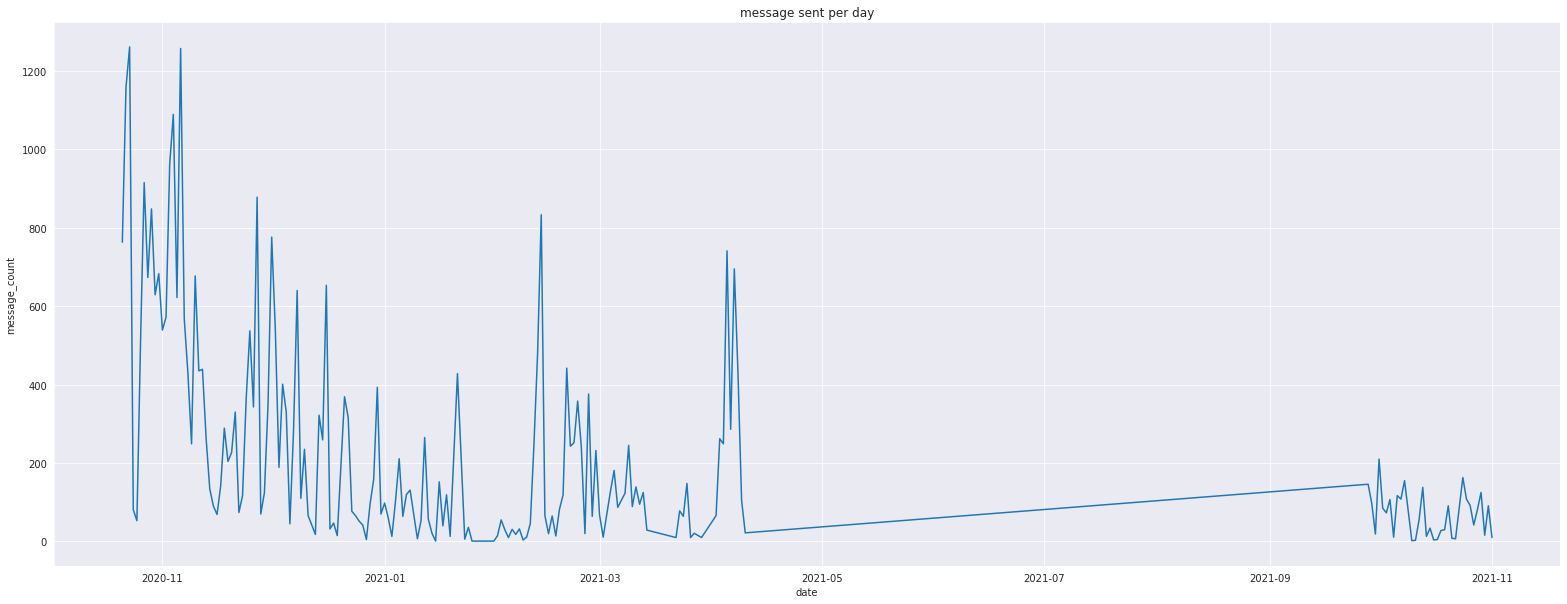

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(27,10))
plt.title('message sent per day')
sns.lineplot(new_df.date,new_df.message_count)

## **Check top 10 most active days of messaging**

---



---



In [ ]:
top10days=new_df.sort_values(by="message_count",ascending=False).head(10)
top10days.reset_index(inplace=True)
top10days.drop(columns="index",inplace=True)
top10days

,date,message_count
0,2020-10-23,1261
1,2020-11-06,1257
2,2020-10-22,1158
3,2020-11-04,1089
4,2020-11-03,962
5,2020-10-27,915
6,2020-11-27,878
7,2020-10-29,848
8,2021-02-13,833
9,2020-12-01,776


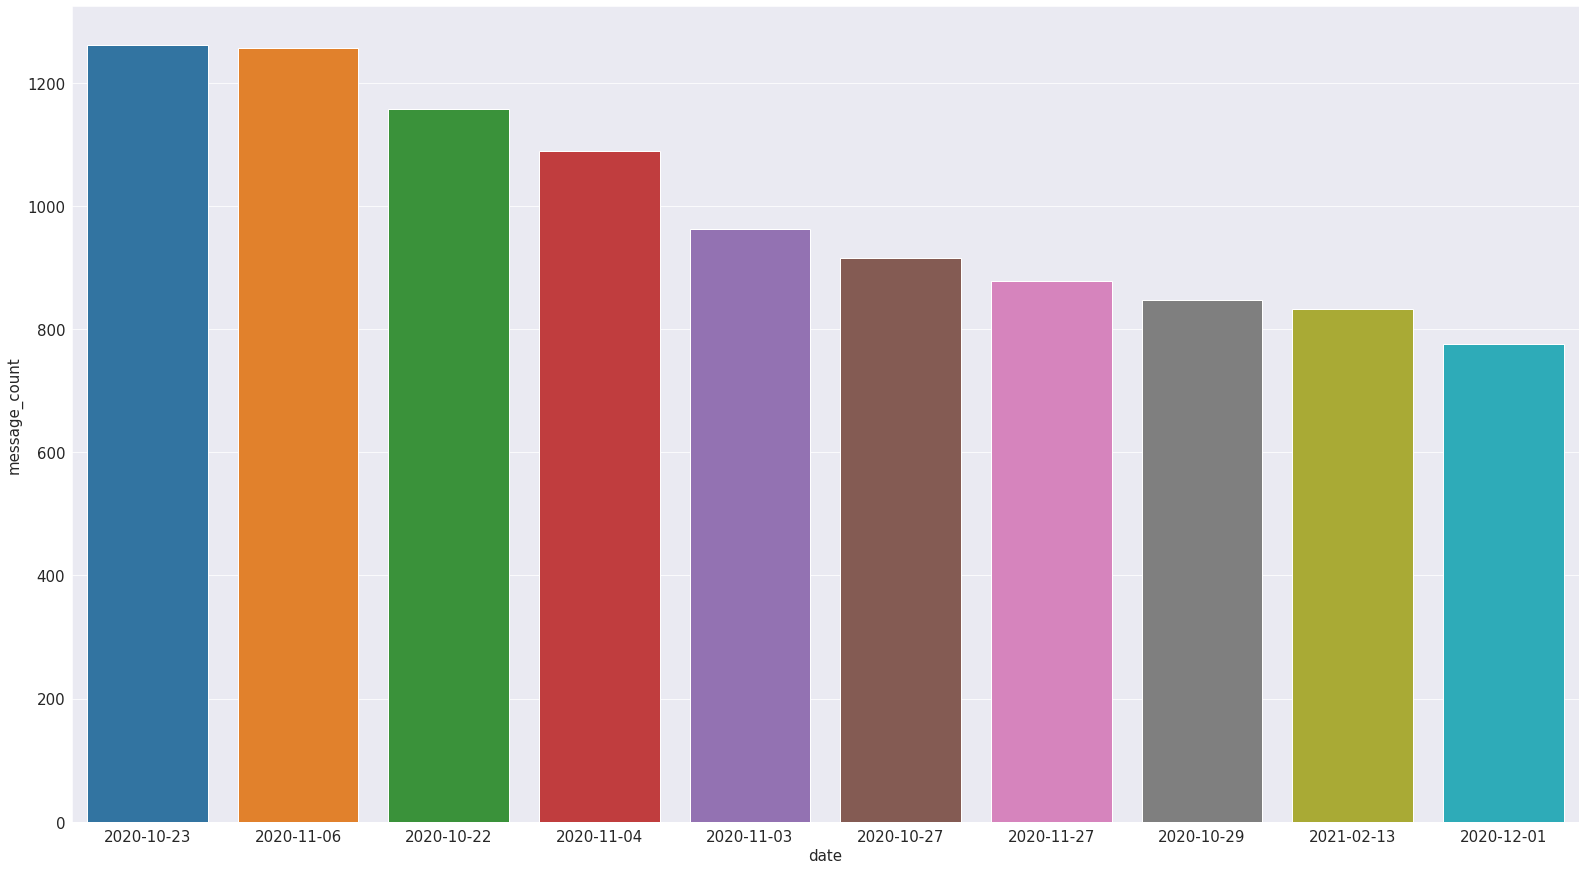

In [ ]:
sns.set_style('darkgrid')
import matplotlib
matplotlib.rcParams['font.size']=15
plt.figure(figsize=(27,15))
sns.barplot(top10days.date,top10days.message_count)
plt.savefig('top10_days.svg',format='svg')

# **top 10 active users in the group**

In [ ]:
df2=df.copy()
df2=df2[df2.user!='group_notification']
top10df=df2.groupby('user')["message"].count().sort_values(ascending=False)

top10df=top10df.head(10).reset_index()
top10df

,user,message
0,Aryan,7572
1,Nikhil Classmate,7191
2,+91 77038 45509,2884
3,+91 87449 99892,2739
4,Anubhuti,2556
5,Yash Sec C,2532
6,Mukul Bhardwaj,2467
7,+91 82878 41374,2383
8,+91 88268 41898,2089
9,+91 87002 26750,1244


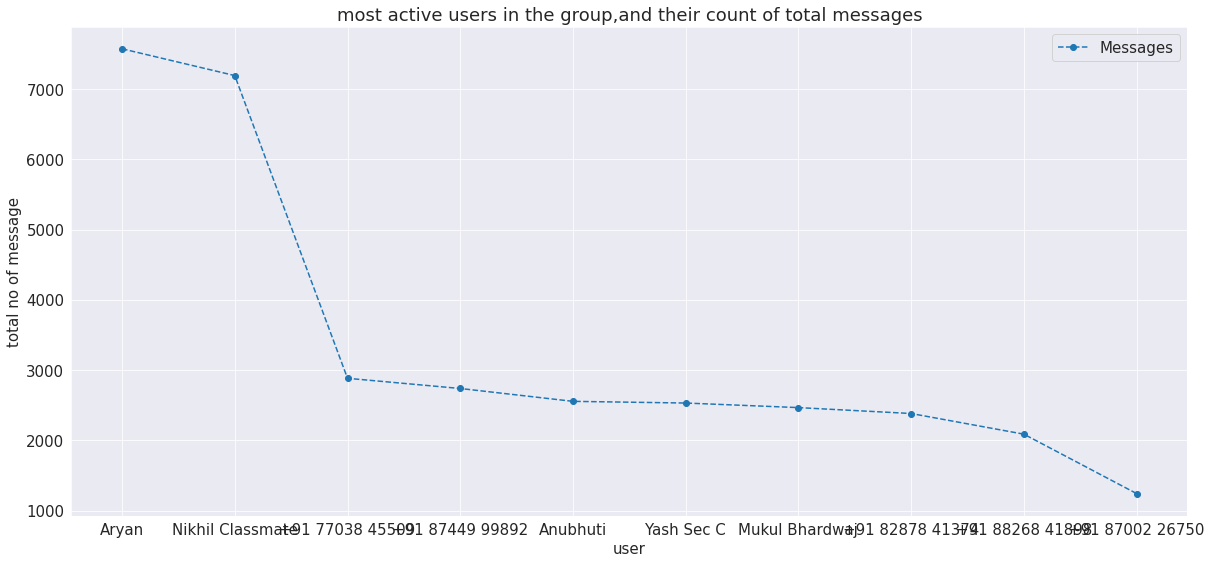

In [ ]:
matplotlib.rcParams['font.size']=15
plt.figure(figsize=(20,9))
plt.plot(top10df.user,top10df.message,marker='o',ls='--')
plt.xlabel("user")
plt.ylabel('total no of message')
plt.title("most active users in the group,and their count of total messages")
plt.legend(['Messages'])

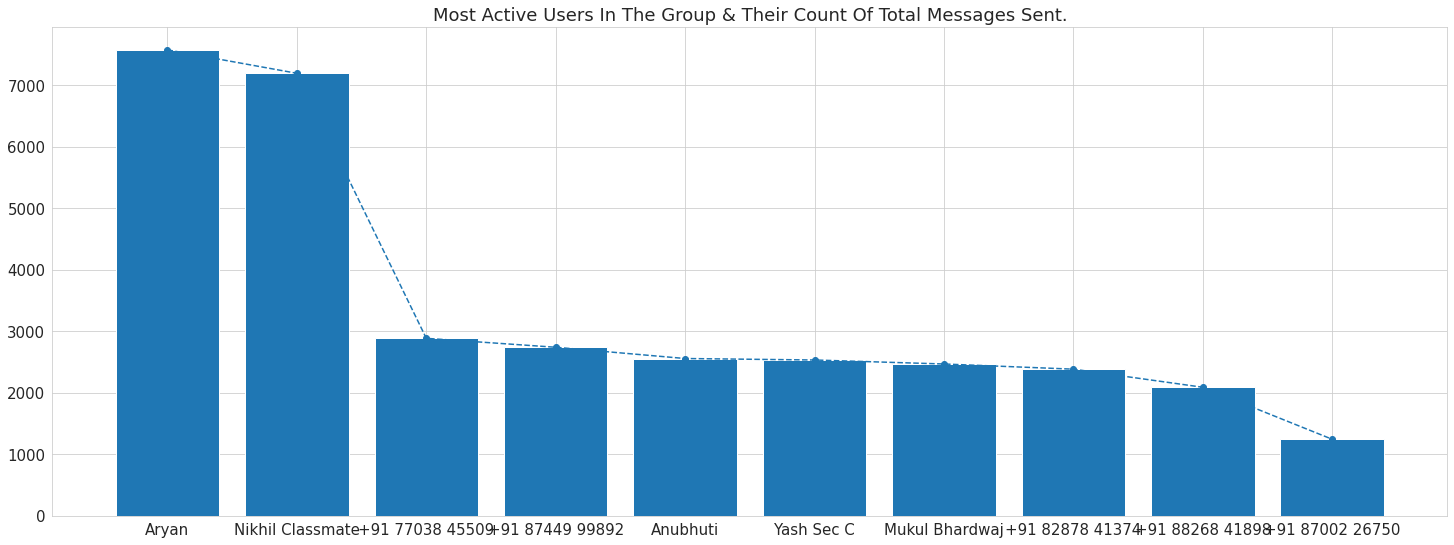

In [ ]:
sns.set_style('whitegrid')
matplotlib.rcParams['font.size']=15
plt.figure(figsize=(25,9))
plt.title("Most Active Users In The Group & Their Count Of Total Messages Sent.")

plt.bar(top10df.user, top10df.message)   # basic bar chart
plt.plot(top10df.user, top10df.message, marker='o', ls='--')  # line chart
plt.show()

# **Fing out ghosts ,inactive users in the group.**

In [ ]:
df2=df.copy()
df2=df2[df2.user!='group_notification']
last10df=df2.groupby("user")['message'].count().sort_values(ascending=True)
last10df=last10df.head(10).reset_index()
last10df

,user,message
0,+91 92679 47423,1
1,+91 93544 85371,3
2,Urvashi Classmate,5
3,+91 79823 42417,5
4,Vaibhav Sharma,7
5,Akarsh Tyagi,10
6,+91 76681 74779,11
7,+91 72918 81249,12
8,+91 82876 01062,12
9,+91 99907 87745,14


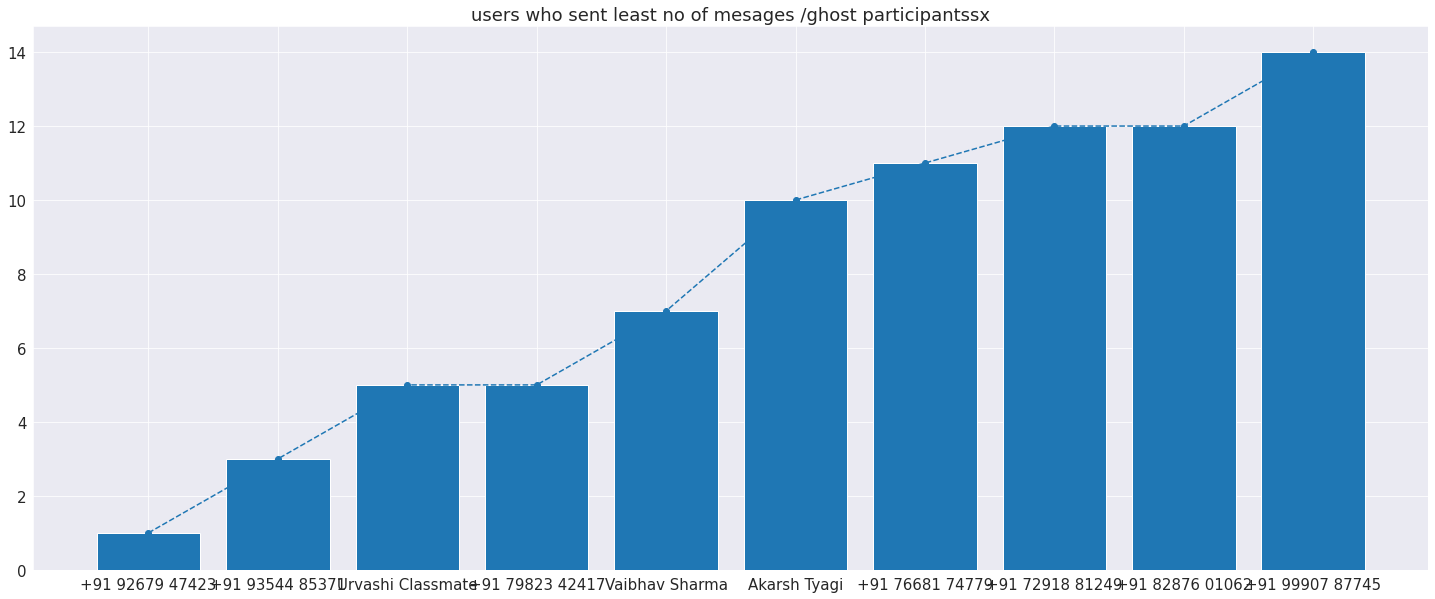

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
plt.title("users who sent least no of mesages /ghost participantssx")
plt.plot(last10df.user,last10df.message,marker='o',ls='--')
plt.bar(last10df.user,last10df.message)
plt.show()


In [ ]:
 df[df.message=='<Media omitted> ']
 


,date_time,user,message,Day,Month,Year,date
18,2020-10-21 14:13:00,+91 82878 41374,<Media omitted>,Wed,Oct,2020,2020-10-21
19,2020-10-21 14:13:00,+91 82878 41374,<Media omitted>,Wed,Oct,2020,2020-10-21
20,2020-10-21 14:13:00,+91 82878 41374,<Media omitted>,Wed,Oct,2020,2020-10-21
21,2020-10-21 14:13:00,+91 82878 41374,<Media omitted>,Wed,Oct,2020,2020-10-21
22,2020-10-21 14:13:00,+91 82878 41374,<Media omitted>,Wed,Oct,2020,2020-10-21
...,...,...,...,...,...,...,...
39944,2021-10-31 21:54:00,Aryan,<Media omitted>,Sun,Oct,2021,2021-10-31
39950,2021-10-31 21:55:00,Aryan,<Media omitted>,Sun,Oct,2021,2021-10-31
39953,2021-10-31 21:56:00,Aryan,<Media omitted>,Sun,Oct,2021,2021-10-31
39956,2021-10-31 22:21:00,+91 79917 49980,<Media omitted>,Sun,Oct,2021,2021-10-31


# **Check Top 10 Users Most Sent Media, Total Messages, Average Words Per Messsage **

In [ ]:
top10media=df[df.message=='<Media omitted> '].groupby('user').count().sort_values(by='message',ascending=False).head(10)
top10media.drop(columns=['date_time','Day','Month','Year','date'],inplace=True)
top10media.rename(columns={"message":'media_sent'},inplace=True)
top10media.reset_index(inplace=True)

top10media



,user,media_sent
0,Aryan,319
1,Mukul Bhardwaj,267
2,Nikhil Classmate,261
3,+91 77038 45509,114
4,+91 79917 49980,109
5,Anubhuti,85
6,Yash Sec C,82
7,+91 80762 93754,71
8,+91 87002 26750,70
9,+91 87449 99892,58


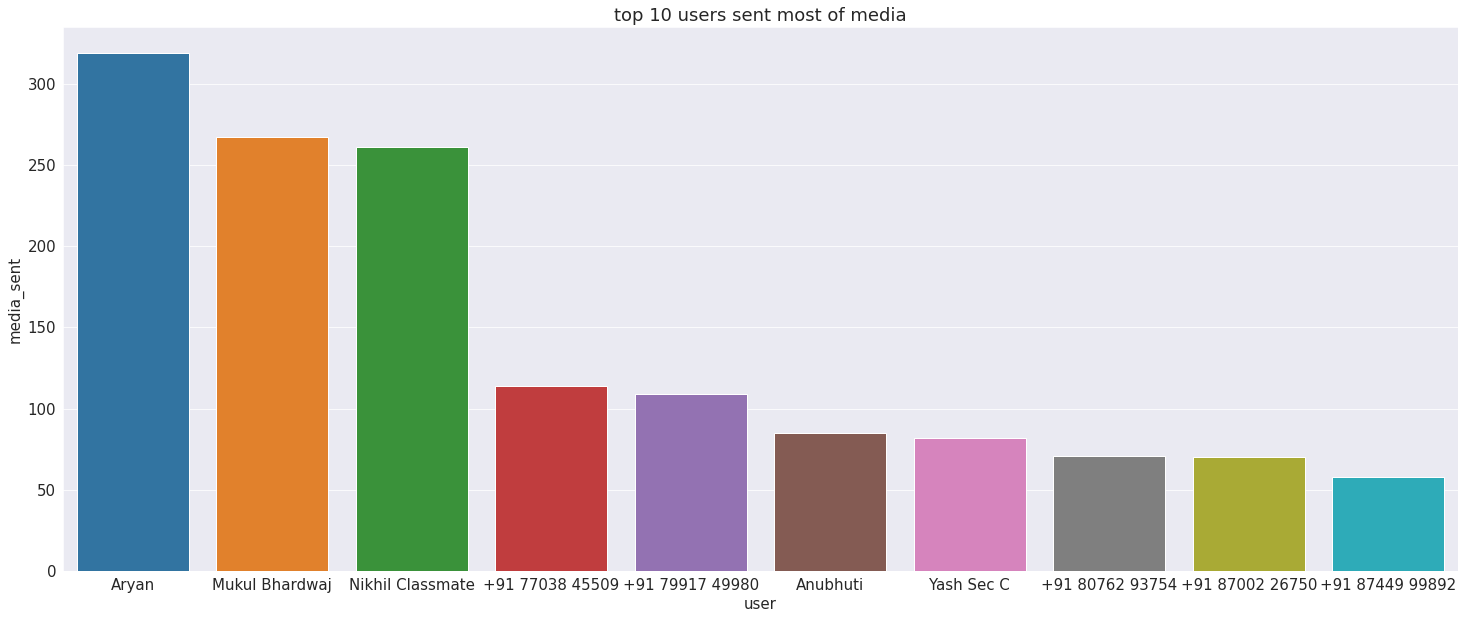

In [ ]:
plt.figure(figsize=(25,10))
plt.title('top 10 users sent most of media')
sns.barplot(top10media.user,top10media.media_sent)

In [ ]:
media_messageDf=df[df.message=='<Media omitted> ']
message_df=df.drop(media_messageDf.index)
message_df['Letter_count']=message_df['message'].apply(lambda s:len(s))
message_df['word_count']=message_df['message'].apply(lambda s: len(s.split(' ')))
message_df['messageCount']=1
l=['Aryan','Nikhil Classmate','+91 77038 45509','+91 87449 99892',	'Anubhuti','Yash Sec C','Mukul Bhardwaj']
for i in range(len(l)):
  req_df=message_df[message_df['user']==l[i]]
  print(f'stats of {l[i]}:')
  print('total message sent',req_df.shape[0])
  word_per_message=(np.sum(req_df['word_count']))/req_df.shape[0]
  print('Average words per messsage',word_per_message)
  media=  media_messageDf[media_messageDf['user']==l[i]].shape[0]
  print('media message sent',media)
  print('---'*10)


stats of Aryan:
total message sent 7253
Average words per messsage 4.106300841031297
media message sent 319
------------------------------
stats of Nikhil Classmate:
total message sent 6930
Average words per messsage 4.52943722943723
media message sent 261
------------------------------
stats of +91 77038 45509:
total message sent 2770
Average words per messsage 4.707942238267148
media message sent 114
------------------------------
stats of +91 87449 99892:
total message sent 2681
Average words per messsage 4.58112644535621
media message sent 58
------------------------------
stats of Anubhuti:
total message sent 2471
Average words per messsage 4.440712262242007
media message sent 85
------------------------------
stats of Yash Sec C:
total message sent 2450
Average words per messsage 6.62734693877551
media message sent 82
------------------------------
stats of Mukul Bhardwaj:
total message sent 2200
Average words per messsage 5.301818181818182
media message sent 267
----------------

In [ ]:
message_df

,date_time,user,message,Day,Month,Year,date,Letter_count,word_count,messageCount
0,2020-10-21 13:42:00,+91 87449 99892,Mute krke padhara tga,Wed,Oct,2020,2020-10-21,22,5,1
1,2020-10-21 13:42:00,Anubhuti,Hn,Wed,Oct,2020,2020-10-21,3,2,1
2,2020-10-21 13:45:00,Nikhil Classmate,Abe padha ni rha tha,Wed,Oct,2020,2020-10-21,21,6,1
3,2020-10-21 13:45:00,Nikhil Classmate,Usne question diya tha,Wed,Oct,2020,2020-10-21,23,5,1
4,2020-10-21 13:47:00,Nikhil Classmate,Bc ab kl test hai,Wed,Oct,2020,2020-10-21,18,6,1
...,...,...,...,...,...,...,...,...,...,...
39993,2021-11-01 19:01:00,Nikhil Classmate,Qbe bht phele pta chalgya,Mon,Nov,2021,2021-11-01,26,6,1
39994,2021-11-01 19:01:00,Nikhil Classmate,Ye,Mon,Nov,2021,2021-11-01,3,2,1
39995,2021-11-01 19:01:00,Nikhil Classmate,Abe,Mon,Nov,2021,2021-11-01,4,2,1
39996,2021-11-01 19:01:00,Nikhil Classmate,Cs valo me bheja hmare pass ni aaya abhi,Mon,Nov,2021,2021-11-01,41,10,1


## **most active hours**

In [ ]:
df3=df.copy()
df3['message_count']=1
df3['hour']=df3['date_time'].apply(lambda x:x.hour)

group_by_hour=df3.groupby('hour').sum().reset_index().sort_values(by='hour')
df3



,date_time,user,message,Day,Month,Year,date,message_count,hour
0,2020-10-21 13:42:00,+91 87449 99892,Mute krke padhara tga,Wed,Oct,2020,2020-10-21,1,13
1,2020-10-21 13:42:00,Anubhuti,Hn,Wed,Oct,2020,2020-10-21,1,13
2,2020-10-21 13:45:00,Nikhil Classmate,Abe padha ni rha tha,Wed,Oct,2020,2020-10-21,1,13
3,2020-10-21 13:45:00,Nikhil Classmate,Usne question diya tha,Wed,Oct,2020,2020-10-21,1,13
4,2020-10-21 13:47:00,Nikhil Classmate,Bc ab kl test hai,Wed,Oct,2020,2020-10-21,1,13
...,...,...,...,...,...,...,...,...,...
39994,2021-11-01 19:01:00,Nikhil Classmate,Ye,Mon,Nov,2021,2021-11-01,1,19
39995,2021-11-01 19:01:00,Nikhil Classmate,Abe,Mon,Nov,2021,2021-11-01,1,19
39996,2021-11-01 19:01:00,Nikhil Classmate,Cs valo me bheja hmare pass ni aaya abhi,Mon,Nov,2021,2021-11-01,1,19
39997,2021-11-01 19:01:00,Rahul Rana,This message was deleted,Mon,Nov,2021,2021-11-01,1,19


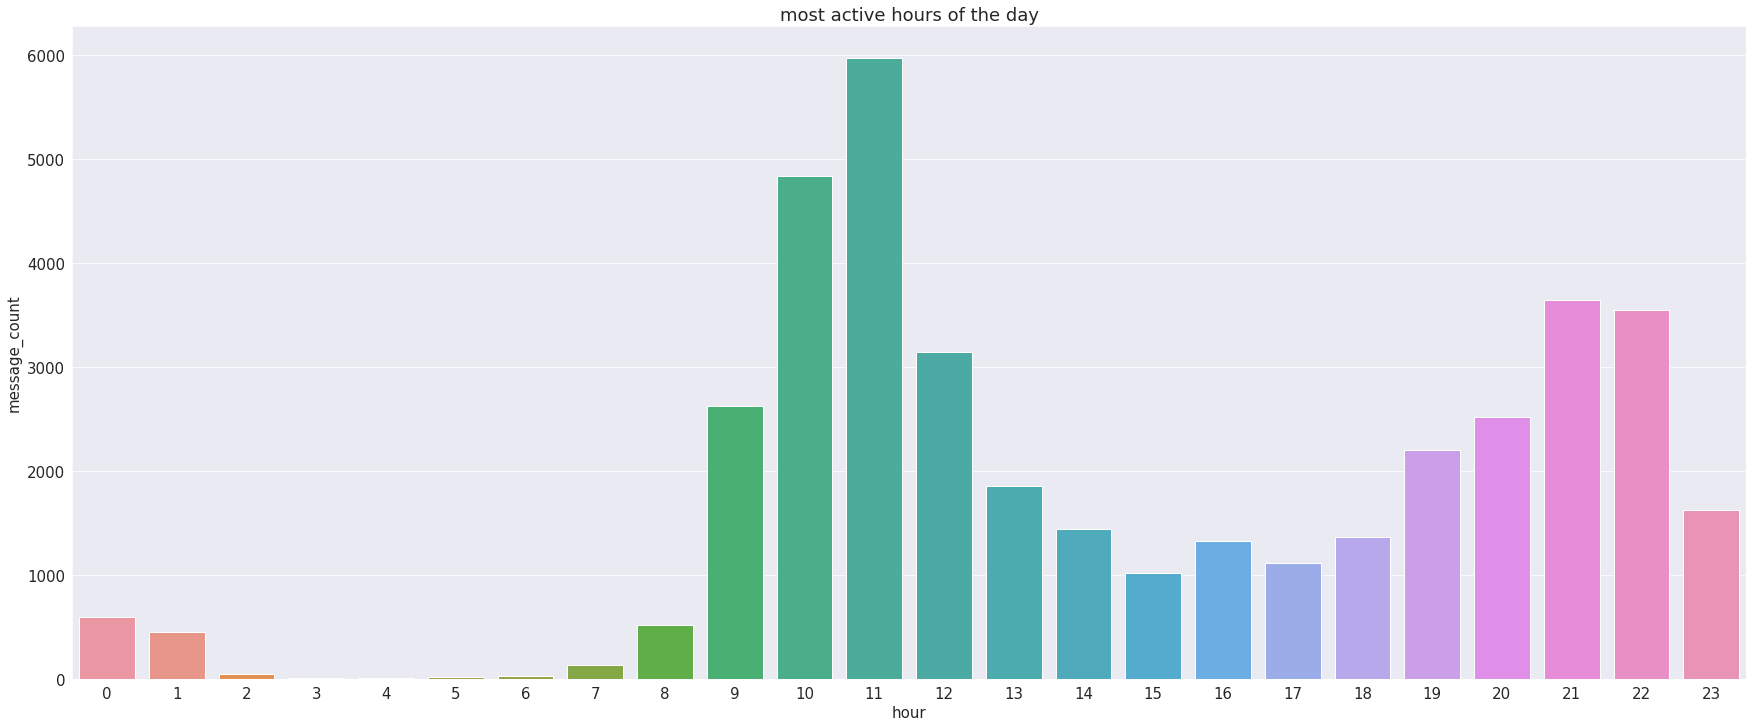

In [ ]:
plt.figure(figsize=(30,12))
plt.title("most active hours of the day")
sns.barplot(group_by_hour.hour,group_by_hour.message_count)

# **most active days**

In [ ]:
grouped_by_day=df3.groupby('Day').sum().reset_index()[['Day','message_count']]

Text(0.5, 1.0, 'most Active Hurs of the day')

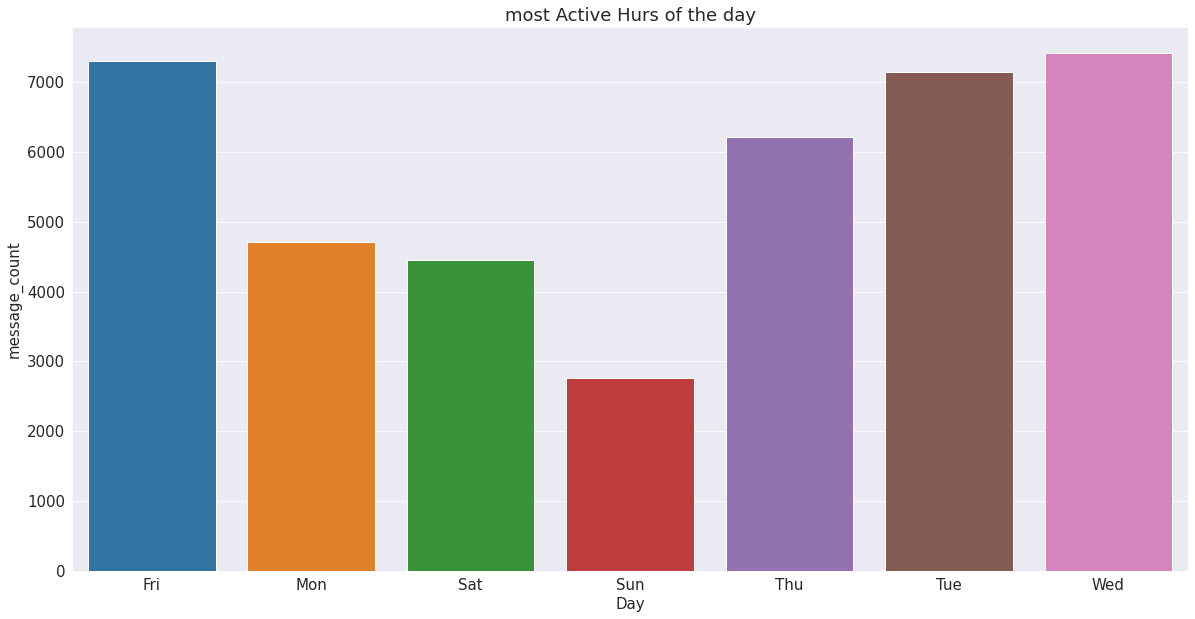

In [ ]:
import matplotlib
matplotlib.rcParams['font.size']=15
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(grouped_by_day.Day,grouped_by_day.message_count)
plt.title('most Active Hurs of the day')

# **most active months**

In [ ]:
grouped_by_month=df3.groupby('Month').sum().reset_index()[['Month','message_count']]

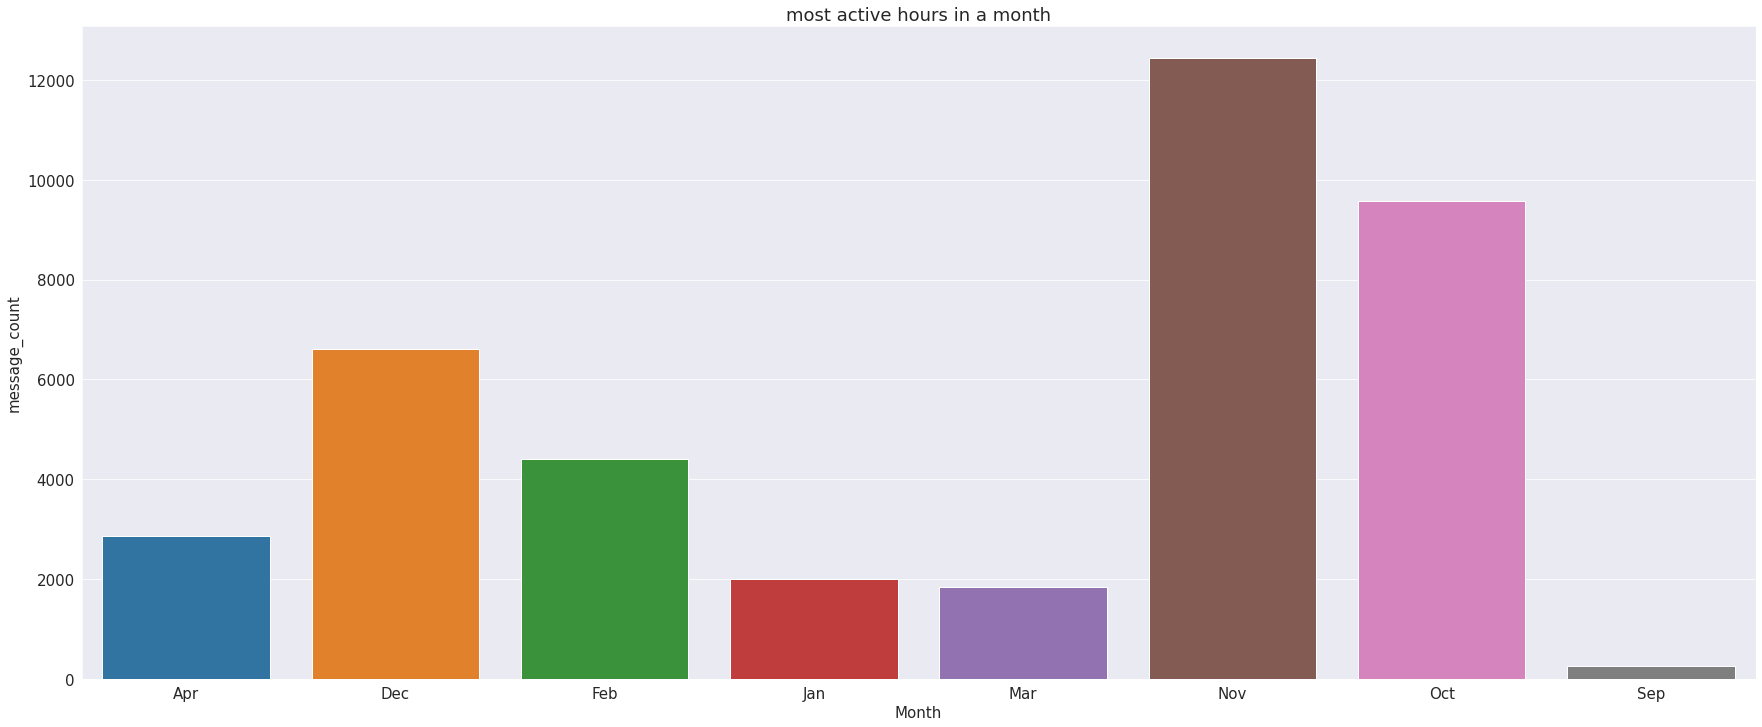

In [ ]:
plt.figure(figsize=(30,12))
plt.title("most active hours in a month")
sns.barplot(grouped_by_month.Month,grouped_by_month.message_count)

# **create a wordcloud for the most used words**

In [ ]:
comment_words=''
stopwords = STOPWORDS.update(['group', 'link', 'invite', 'joined','join', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])

for val in df3.message.values:
  val=str(val)
  tokens=val.split()
  
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()
  for words in tokens:
    comment_words=comment_words+words+' '

wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white',  
                min_font_size = 8).generate(comment_words)


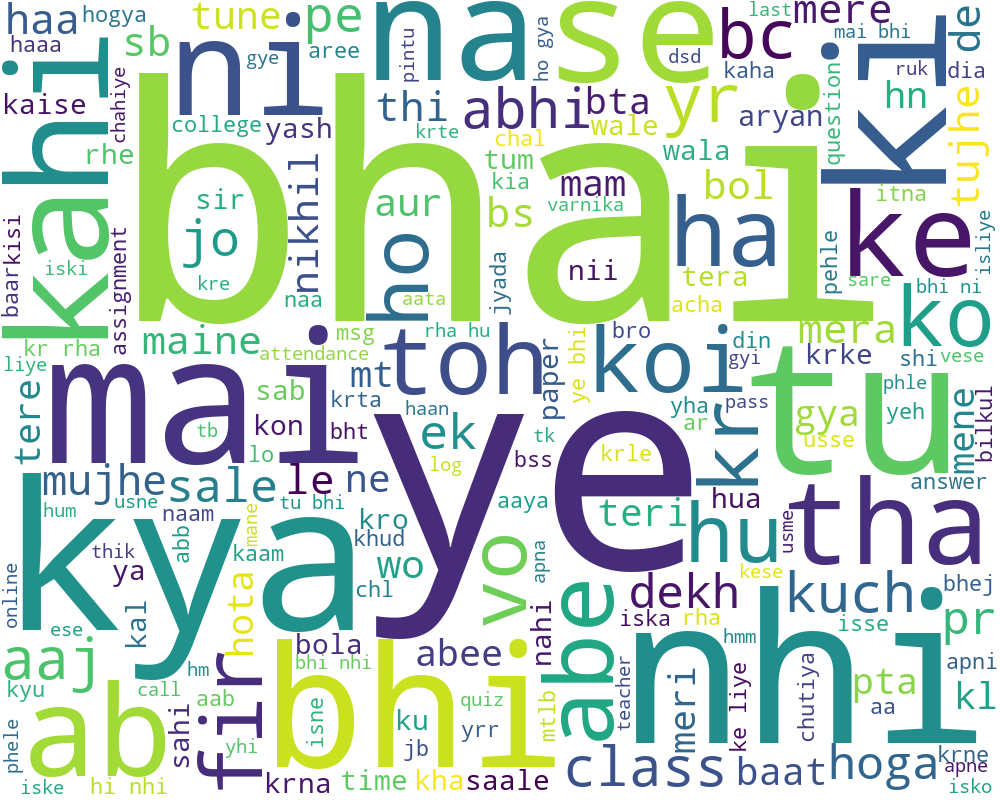

In [ ]:
wordcloud.to_image()

# **create a wordcloud for most used words by most active users**

author name Aryan


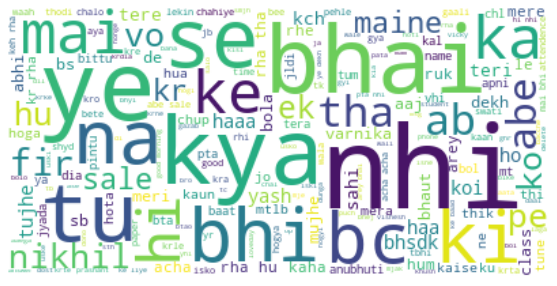

author name Nikhil Classmate


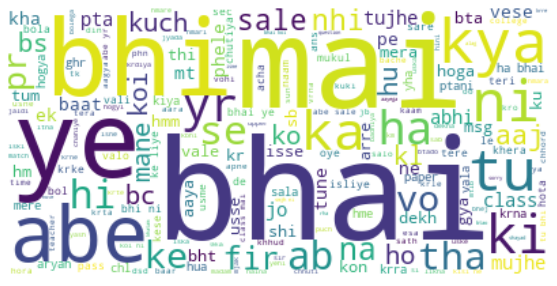

author name +91 77038 45509


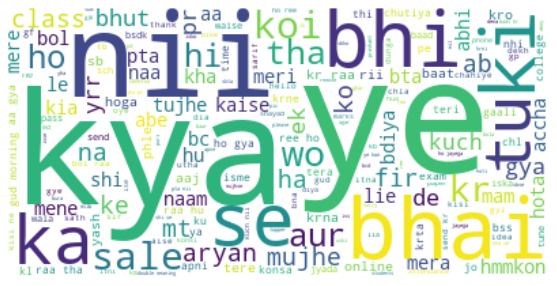

author name +91 87449 99892


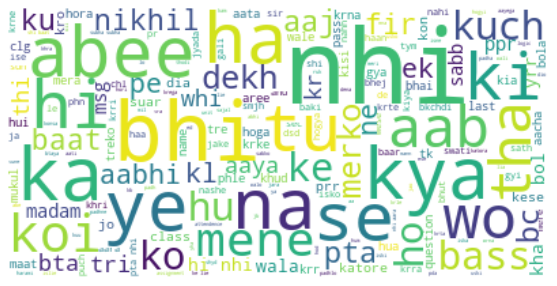

author name Anubhuti


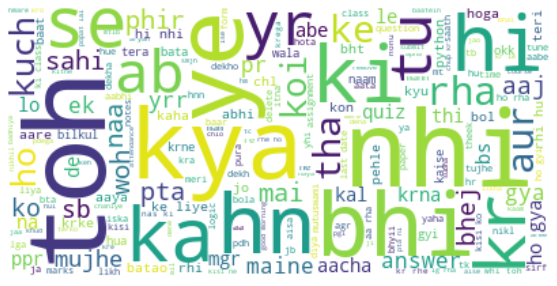

author name Yash Sec C


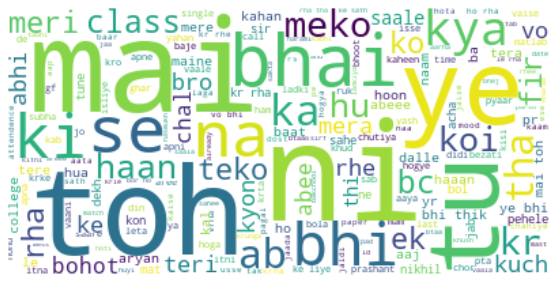

author name Mukul Bhardwaj


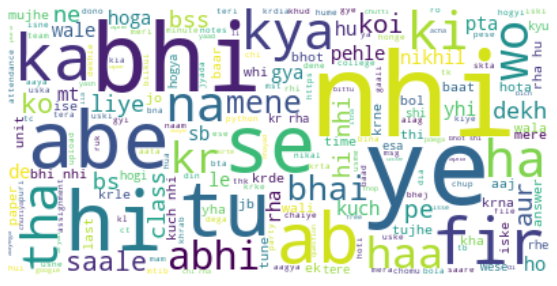

In [ ]:
l=['Aryan','Nikhil Classmate','+91 77038 45509','+91 87449 99892',	'Anubhuti',	'Yash Sec C','Mukul Bhardwaj']	
for i in range(len(l)):
  dummy_df=message_df[message_df['user']==l[i]]
  text=' '.join(message.lower() for message in dummy_df.message)
  stopwords=STOPWORDS.update(['group', 'link', 'invite', 'joined','join', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])
  print('author name',l[i])
  wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(text)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [ ]:
import emojis
new_list = emojis.get('🤔 🙈 me así, bla es se 😌 ds 💕👭👙')
print(new_list)



{'🙈', '😌', '🤔', '👭', '💕', '👙'}


In [ ]:
!pip install emoji
!pip install emojis

In [ ]:
emojies=''
for val in df3.message.values:
  new_emojies = emojis.get(val) 
  new_emojies_str=' '.join(str(i) for i in new_emojies)
 
